# Intent Anaylsis using SVC

We are going to build a **sentiment analysis model** to predict intent of the writer in a document. The Support Vector Classifier used in this project is based on LIBSVM implementation.

External libraries we will use are sklearn, pandas and matplotlib. Let's start by importing them.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

'r8' dataset is used in this notebook. This dataset is already preprocessed and split into training and testing data, so we just have to load the corresponding csv into their respective variables.

[Download dataset](https://www.kaggle.com/datasets/weipengfei/ohr8r52)

In [2]:
# Loading data
train_orig, test_orig = [pd.read_csv(f'dataset/r8/r8-{w}-stemmed.csv') for w in ('train', 'test')]
train_df = train_orig.drop('edge', axis=1)
test_df = test_orig.drop('edge', axis=1)
train_df.describe()

,text,intent
count,4937,4937
unique,4876,8
top,fed add reserv custom repurchas feder reserv e...,earn
freq,3,2610


### Exploratory data analysis

Here, we will visualize the distribution of data. We can see that data is **highly imbalanced**. This knowledge may help us in choosing the right approach for classification.

{'earn': 2610, 'acq': 1425, 'trade': 228, 'ship': 95, 'grain': 32, 'crude': 237, 'interest': 132, 'money-fx': 178}


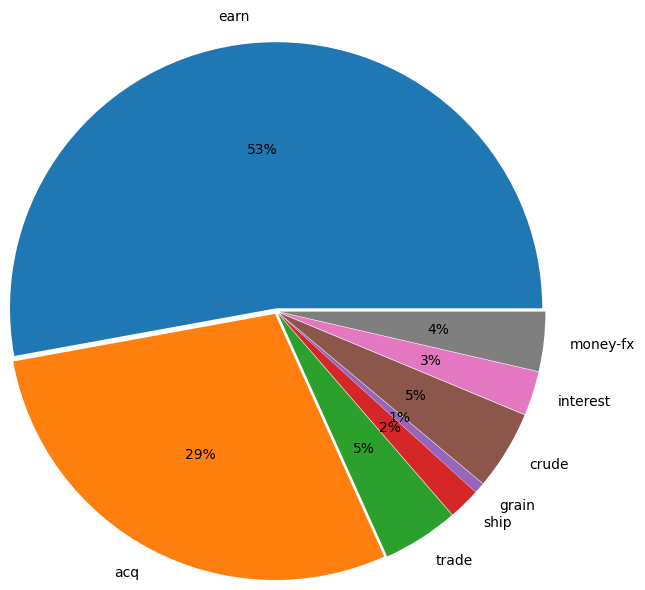

In [3]:
intents = list(train_df['intent'].unique())
n_intents = [len(train_df[train_df['intent'] == x]['intent']) for x in intents]
print({x:y for x,y in zip(intents, n_intents)})

plt.pie(n_intents, labels= intents, autopct= '%1.0f%%',
        radius= 1.8, explode= [0.02 for _ in range(len(intents))])
plt.show()

### Vectorizing data

Now, we will convert the string documents in dataset into TF-IDF vectors. This is one of the simpler methods to represent a document numerically for training purposes.

Also, we will get the list of labels for the documents from the dataframe.

In [4]:
# Vectorizing training data
vectorizer = TfidfVectorizer()
train_X = vectorizer.fit_transform(train_df['text'])

train_Y = train_df['intent']

In [5]:
# Vectorizing Testing data
def process_data(df, tfidf_vectorizer):
    X = tfidf_vectorizer.transform(df['text'])
    Y = df['intent']
    return X, Y

test_X, test_Y = process_data(test_df, vectorizer)
test_df.describe()

,text,intent
count,2189,2189
unique,2175,8
top,fhlbb short term discount note rate feder home...,earn
freq,3,1083


## Training the classifier

Let's now choose a classifier model for our analysis. There are many different algorithms used for sentiment analysis, but here we are gonna use a **Support Vector Classifier (LIBSVM)**. It has been shown to be quite effective for this particular task while being incredibly fast and simple.

In [6]:
svc = SVC(C = 100, gamma='scale')
svc.fit(train_X, train_Y)
print(f"Training accuracy- {svc.score(train_X, train_Y)}")
print(f"Testing accuracy-  {svc.score(test_X, test_Y)}")

Training accuracy- 0.9993923435284586
Testing accuracy-  0.9502055733211512


### Conclusion

So, finally our model achieved a testing accuracy of ***95.02%***, which is quite good for a sentiment analysis task. Though our model may be overfitting and any attempt to reduce overfitting is severely harming the testing accuracy of the model.

Humans tend to agree around **80-85%** while evaluating the intent of a document. Hence, we have already far surpassed the human-level performance of this task. Some deep learning models can perform better and achieve higher accuracy, but none can match the simplicity and speed of this model.